In [ ]:
import struct
import pyaudio
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
p = pyaudio.PyAudio()

In [ ]:
print('Available audio input devices:')
input_devices = []
for i in range(p.get_device_count()):
    dev = p.get_device_info_by_index(i)
    if dev.get('maxInputChannels'):
        input_devices.append(i)
        print(i, dev.get('name'))

In [ ]:
CHUNK = 1024 * 4
FORMAT =  pyaudio.paInt16
CHANNELS=1
RATE = 44100
dev_idx=6

In [ ]:
fig, ax = plt.subplots()

x= np.arange(0,2*CHUNK, 2)
line, =ax.plot(x, np.random.rand(CHUNK))
ax.set_ylim(0,255)
ax.set_xlim(0,CHUNK)

In [ ]:
stream = p.open(format=FORMAT, channels=1, rate=RATE, input_device_index=dev_idx, input=True, frames_per_buffer=CHUNK)

while True:
    data  = stream.read(CHUNK,exception_on_overflow = False)
    #data_int = np.frombuffer(data, 'int16')
    data_int = np.array(struct.unpack(str(2*CHUNK)+ 'B', data), dtype='b')[::2]+127
    print(data_int)
    line.set_ydata(data_int)
    fig.canvas.draw()
    fig.canvas.flush_events()

In [1]:
import struct
import pyaudio
import numpy as np
import matplotlib.pyplot as plt


p = pyaudio.PyAudio()



ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
Jac

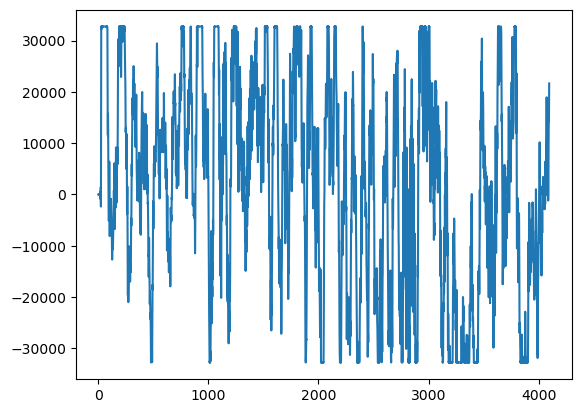

In [24]:

CHUNK = 1024 * 4
FORMAT =  pyaudio.paInt16
CHANNELS=1
RATE = 44100
dev_idx=6


stream = p.open(format=FORMAT, channels=1, rate=RATE, input_device_index=dev_idx, input=True, frames_per_buffer=CHUNK)
data=stream.read(CHUNK)
data_int = np.frombuffer(data, 'int16')
#data_int= np.array(struct.unpack(str(2*CHUNK)+ 'B', data), dtype='b')[::2]+127
data_int

fig, ax =plt.subplots()

ax.plot(data_int, '-')

In [ ]:
while True:
    data  = stream.read(CHUNK,exception_on_overflow = False)
    #data_int = np.frombuffer(data, 'int16')
    data_int = np.array(struct.unpack(str(2*CHUNK)+ 'B', data), dtype='b')[::2]+127
    print(data_int)
    line.set_ydata(data_int)
    fig.canvas.draw()
    fig.canvas.flush_events()


In [1]:
import struct
import pyaudio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib tk

p = pyaudio.PyAudio()

ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:877:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
Jac

In [ ]:

CHUNK = 1024 * 4
FORMAT =  pyaudio.paInt16
CHANNELS=1
RATE = 44100
dev_idx=6
stream = p.open(format=FORMAT, channels=1, rate=RATE, input_device_index=dev_idx, input=True, frames_per_buffer=CHUNK)


fig, ax =plt.subplots()

#ax.set_ylim(-40000,40000)
ax.set_ylim(-255,255)
ax.set_xlim(0,CHUNK)

x= np.arange(0,2*CHUNK,2)
line, = ax.plot(x, np.random.rand(CHUNK))

while True:
    data=stream.read(CHUNK,exception_on_overflow = False)
    #data_int = np.frombuffer(data, 'int16')
    data_int= np.array(struct.unpack(str(2*CHUNK)+ 'B', data), dtype='b')[::2]+127
    line.set_ydata(data_int)
    fig.canvas.draw()
    fig.canvas.flush_events()


#ax.plot(data_int, '-')

In [ ]:

stream = p.open(format=FORMAT, channels=1, rate=RATE, input_device_index=dev_idx, input=True, frames_per_buffer=CHUNK)
frames = []
RECORD_SECONDS=2
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK,exception_on_overflow = False)
    decoded = np.frombuffer(data, 'int16')
    print(decoded)
    
    #mfcc_feat = mfcc(decoded, samplerate=SAMPLERATE/3, winlen=WINDOW_SIZE, winstep=WINDOW_STEP, nfft=NFFT)    
    #if len(frames) < 299:
        #frames.append(mfcc_feat)        
    #elif len(frames) >= 299:
     #   predict_test = tf.convert_to_tensor(frames)
        #result = model.predict(predict_test)
      #  frames = []
       # frames.append(mfcc_feat)

stream.stop_stream()
stream.close()
p.terminate()

In [ ]:

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE, input=True,
    output=True,
    input_device_index=dev_idx,
    frames_per_buffer=CHUNK
)

In [ ]:
while True:
    data  = stream.read(CHUNK,exception_on_overflow = False)
    data_int = np.array(struct.unpack(str(2*CHUNK)+ 'B', data), dtype='b')[::2]+127
    line.set_ydata(data_int)
    fig.canvas.draw()
    fig.canvas.flush_events()

In [ ]:
for i in range(p.get_device_count()):
    print (p.get_device_info_by_index(i))

In [ ]:
p.get_default_input_device_info()

In [ ]:
pyaudio.pa.__file__